In [18]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm

### roll die 4 times

In [19]:
faces = 4
num_simulations = 1000
k = 4

sums = []
weights=[]
faces=[]
for i in range(1,k+1):
    if k == 1:
        faces.append(i)
        weights.append(1/2**(k-1))
    else:
        faces.append(i)
        weights.append(1/2**(k-1))

for i in range(num_simulations):
    c_face = random.choices(range(1,k+1),weights=weights,k=4)
    sums.append(sum(c_face))
#print(sums)
expected_sum_theoretical = sum([i / (2 ** (i - 1)) for i in range(2, k + 1)])
expected_sum_theoretical =expected_sum_theoretical +  1/(2 ** (k - 1))

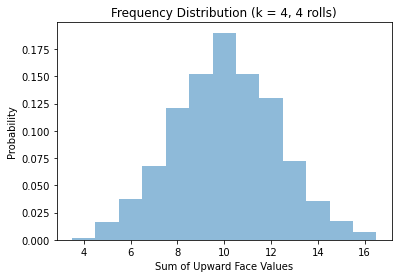

Theoretical Expected Sum: 9.5
Actual Expected Sum (Simulation): 10.061
Five-Number Summary: [ 4.  9. 10. 12. 16.]


In [20]:
five_num_summary = np.percentile(sums, [0, 25, 50, 75, 100])
plt.hist(sums, bins=np.arange(min(sums), max(sums) + 1.5) - 0.5, alpha=0.5, density=True)
plt.xlabel("Sum of Upward Face Values")
plt.ylabel("Probability")
plt.title(f"Frequency Distribution (k = {k}, 4 rolls)")
plt.show()
print("Theoretical Expected Sum:", expected_sum_theoretical*4)
print("Actual Expected Sum (Simulation):", np.mean(sums))
print("Five-Number Summary:", five_num_summary)

### roll die 8 times

In [21]:
faces = 4
num_simulations = 1000
k = 4

sums = []
weights=[]
faces=[]
for i in range(1,k+1):
    if k == 1:
        faces.append(i)
        weights.append(1/2**(k-1))
    else:
        faces.append(i)
        weights.append(1/2**(k-1))

for i in range(num_simulations):
    c_face = random.choices(range(1,k+1),weights=weights,k=6)
    sums.append(sum(c_face))
#print(sums)
expected_sum_theoretical = sum([i / (2 ** (i - 1)) for i in range(2, k + 1)])
expected_sum_theoretical =expected_sum_theoretical +  1/(2 ** (k - 1))

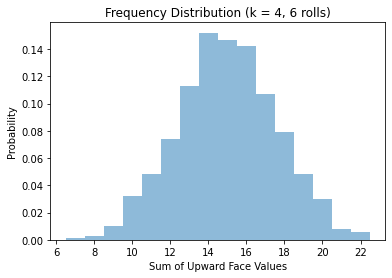

Theoretical Expected Sum: 14.25
Actual Expected Sum (Simulation): 14.984
Five-Number Summary: [ 7. 13. 15. 17. 22.]


In [22]:
five_num_summary = np.percentile(sums, [0, 25, 50, 75, 100])
plt.hist(sums, bins=np.arange(min(sums), max(sums) + 1.5) - 0.5, alpha=0.5, density=True)
plt.xlabel("Sum of Upward Face Values")
plt.ylabel("Probability")
plt.title(f"Frequency Distribution (k = {k}, 6 rolls)")
plt.show()
print("Theoretical Expected Sum:", expected_sum_theoretical*6)
print("Actual Expected Sum (Simulation):", np.mean(sums))
print("Five-Number Summary:", five_num_summary)

### die with 16 roll

In [23]:
faces = 4
num_simulations = 1000
k = 4

sums = []
weights=[]
faces=[]
for i in range(1,k+1):
    if k == 1:
        faces.append(i)
        weights.append(1/2**(k-1))
    else:
        faces.append(i)
        weights.append(1/2**(k-1))

for i in range(num_simulations):
    c_face = random.choices(range(1,k+1),weights=weights,k=16)
    sums.append(sum(c_face))
#print(sums)
expected_sum_theoretical = sum([i / (2 ** (i - 1)) for i in range(2, k + 1)])
expected_sum_theoretical =expected_sum_theoretical +  1/(2 ** (k - 1))

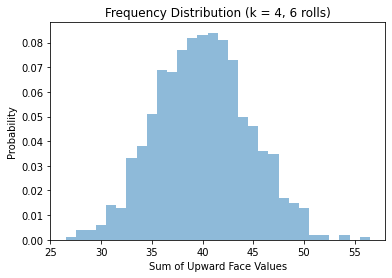

Theoretical Expected Sum: 38.0
Actual Expected Sum (Simulation): 40.022
Five-Number Summary: [27. 37. 40. 43. 56.]


In [24]:
five_num_summary = np.percentile(sums, [0, 25, 50, 75, 100])
plt.hist(sums, bins=np.arange(min(sums), max(sums) + 1.5) - 0.5, alpha=0.5, density=True)
plt.xlabel("Sum of Upward Face Values")
plt.ylabel("Probability")
plt.title(f"Frequency Distribution (k = {k}, 6 rolls)")
plt.show()
print("Theoretical Expected Sum:", expected_sum_theoretical*16)
print("Actual Expected Sum (Simulation):", np.mean(sums))
print("Five-Number Summary:", five_num_summary)

# PART-B

In [25]:
# fetch dataset
spambase = fetch_ucirepo(id=94)

In [26]:
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [27]:
# data (as pandas dataframes)
X = spambase.data.features.to_numpy()
y = spambase.data.targets.to_numpy()

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

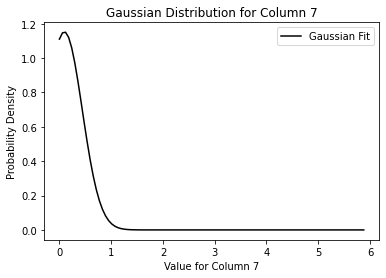

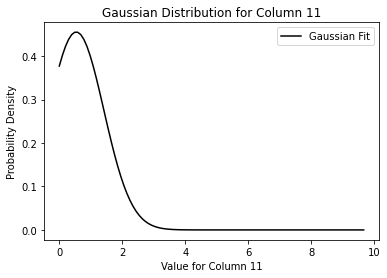

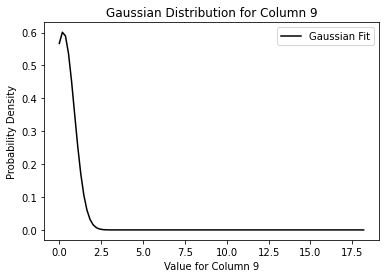

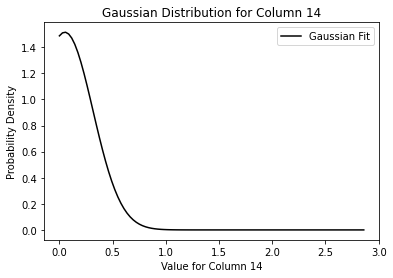

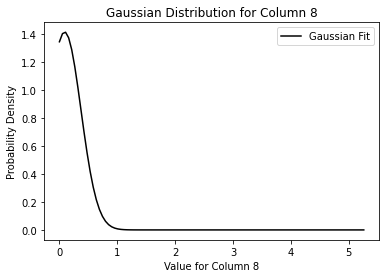

In [29]:
# Select 5 random columns from X_train
random_columns = np.random.choice(X_train.shape[1], 5, replace=False)

# Create Gaussian distribution plots for the selected columns
for col in random_columns:
    mu, std = norm.fit(X_train[:, col])
    x = np.linspace(X_train[:, col].min(), X_train[:, col].max(), 100)
    pdf = norm.pdf(x, mu, std)

    plt.figure()
    plt.plot(x, pdf, 'k-', label="Gaussian Fit")
    plt.xlabel(f'Value for Column {col}')
    plt.ylabel('Probability Density')
    plt.title(f'Gaussian Distribution for Column {col}')
    plt.legend()

plt.show()


# Naive bayes on normal data

In [30]:
classes = np.unique(y_train)
n_row,n_col = X_train.shape
n_classes = len(classes)
mean_np = np.zeros((2,n_col),dtype=np.float64)
variance_np = np.zeros((2,n_col),dtype=np.float64)

In [49]:
class_prior=np.zeros(n_classes,dtype=np.float64)
class_prior[0]=sum(y_train==0)/n_row
class_prior[1]=sum(y_train==1)/n_row
print("class 0 proir"+str(class_prior[0]))
print("class 1 proir"+str(class_prior[1]))
print("total number of parament needed: "+str(4*n_col))

class 0 proir0.6111801242236025
class 1 proir0.38881987577639754
total number of parament needed: 228


In [32]:
for n_class in range(0,2):
    sample = X_train[y_train == n_class]
    for cur_col in range(n_col):
        mean_np[n_class,cur_col]=np.mean(sample[:,cur_col])
        variance_np[n_class,cur_col]=np.var(sample[:,cur_col])
        

In [33]:
def normal_distribution(target,mean,var):
    epsilon = 1e-10  # A small constant to prevent division by zero
    if var < epsilon:
        var = epsilon
    numerator = np.exp((-1)*(target-mean)**2 / (2 * var))
    denominator = np.sqrt(2 * np.pi * var) + epsilon
    return numerator/denominator

In [34]:
def predict(X_test):
    n_r,n_c = X_test.shape
    y_pred=[]
    for i in range(n_r):
        #c_0=np.log(class_prior[0])
        #c_1=np.log(class_prior[1])
        c_0=0
        c_1=0
        for col in range(n_c):
            c_0+= np.log(normal_distribution(X_test[i][col],mean_np[0][col],variance_np[0][col]))
            c_1+= np.log(normal_distribution(X_test[i][col],mean_np[1][col],variance_np[1][col]))
        if(c_0>c_1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return np.array(y_pred)
            
    

In [35]:
y_pred=predict(X_test)

<ipython-input-34-674281384692>:11: RuntimeWarning: divide by zero encountered in log
  c_1+= np.log(normal_distribution(X_test[i][col],mean_np[1][col],variance_np[1][col]))
<ipython-input-34-674281384692>:10: RuntimeWarning: divide by zero encountered in log
  c_0+= np.log(normal_distribution(X_test[i][col],mean_np[0][col],variance_np[0][col]))


In [36]:
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.8480463096960926
Precision: 0.73224043715847
Recall: 0.9745454545454545
F1-Score: 0.8361934477379096


# Naive Bayes after Log transformation

In [37]:
X = np.log1p(X)
X = np.where(np.isinf(X) | np.isnan(X), 0, X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()

In [38]:
y_pred=predict(X_test)

<ipython-input-34-674281384692>:11: RuntimeWarning: divide by zero encountered in log
  c_1+= np.log(normal_distribution(X_test[i][col],mean_np[1][col],variance_np[1][col]))
<ipython-input-34-674281384692>:10: RuntimeWarning: divide by zero encountered in log
  c_0+= np.log(normal_distribution(X_test[i][col],mean_np[0][col],variance_np[0][col]))


In [39]:
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.8075253256150506
Precision: 0.6792929292929293
Recall: 0.9781818181818182
F1-Score: 0.8017883755588674


# using sckit learn library

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=41)
y_train = y_train.ravel()
y_test = y_test.ravel()
y_val = y_val.ravel()
original_model = GaussianNB()
original_model.fit(X_train, y_train)

GaussianNB()

In [41]:
X_log = np.log1p(X)
X_log = np.where(np.isinf(X_log) | np.isnan(X_log), 0, X_log)
X_train_log, X_temp_log, y_train_log, y_temp_log = train_test_split(X_log, y, test_size=0.3, random_state=41)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_temp_log, y_temp_log, test_size=0.5, random_state=41)
y_train_log = y_train_log.ravel()
y_test_log = y_test_log.ravel()
y_val = y_val.ravel()
log_transformed_model = GaussianNB()
log_transformed_model.fit(X_log, y)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [42]:
y_pred_o = original_model.predict(X_test)
y_pred_log = log_transformed_model.predict(X_test_log) 

In [43]:
#Calculate ROC curve and AUC for model1
fpr1, tpr1, _ = roc_curve(y_test, y_pred_o)
roc_auc1 = auc(fpr1, tpr1)

# Calculate ROC curve and AUC for model2
fpr2, tpr2, _ = roc_curve(y_test, y_pred_log)
roc_auc2 = auc(fpr2, tpr2)

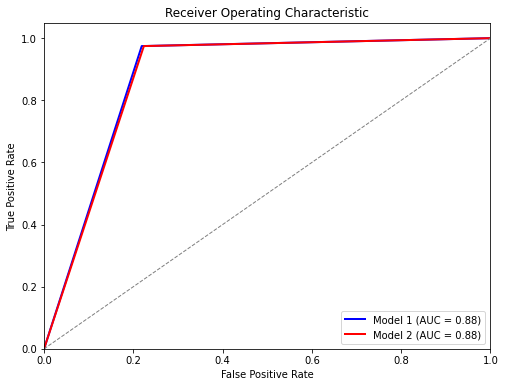

In [44]:
# Plot the ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Model 2 (AUC = {roc_auc2:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

In [45]:
accuracy_original = accuracy_score(y_test, y_pred_o)
print(f"Accuracy for the original model: {accuracy_original}")

# Calculate accuracy for the log-transformed model
accuracy_log_transformed = accuracy_score(y_test, y_pred_log)
print(f"Accuracy for the log-transformed model: {accuracy_log_transformed}")

Accuracy for the original model: 0.8581765557163531
Accuracy for the log-transformed model: 0.8552821997105644
